In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("nvidia_stock_2015_to_2024.csv")

In [4]:
df.head()

,Unnamed: 0,date,open,high,low,close,adjclose,volume
0,0,2015-01-02,0.50325,0.50700,0.49525,0.50325,0.483218,113680000
1,1,2015-01-05,0.50325,0.50475,0.49250,0.49475,0.475056,197952000
2,2,2015-01-06,0.49550,0.49600,0.47925,0.47975,0.460654,197764000
3,3,2015-01-07,0.48325,0.48750,0.47700,0.47850,0.459453,321808000
4,4,2015-01-08,0.48400,0.49950,0.48375,0.49650,0.476737,283780000


In [5]:
df.tail()

,Unnamed: 0,date,open,high,low,close,adjclose,volume
2364,2364,2024-05-24,104.448997,106.474998,103.000000,106.469002,106.460258,429494000
2365,2365,2024-05-28,110.244003,114.939003,109.883003,113.901001,113.891647,652728000
2366,2366,2024-05-29,113.050003,115.491997,110.901001,114.824997,114.815567,557442000
2367,2367,2024-05-30,114.650002,115.819000,109.663002,110.500000,110.490921,487350000
2368,2368,2024-05-31,112.519997,112.717003,106.940002,109.633003,109.624001,613263000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2369 non-null   int64  
 1   date        2369 non-null   object 
 2   open        2369 non-null   float64
 3   high        2369 non-null   float64
 4   low         2369 non-null   float64
 5   close       2369 non-null   float64
 6   adjclose    2369 non-null   float64
 7   volume      2369 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 148.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2369.0,1.184000e+03,6.840157e+02,0.000000e+00,5.920000e+02,1.184000e+03,1.776000e+03,2.368000e+03
open,2369.0,1.418848e+01,1.868347e+01,4.812500e-01,2.998250e+00,6.191500e+00,1.791500e+01,1.146500e+02
high,2369.0,1.444591e+01,1.902010e+01,4.875000e-01,3.045500e+00,6.262750e+00,1.824400e+01,1.158190e+02
low,2369.0,1.391953e+01,1.831567e+01,4.735000e-01,2.947500e+00,6.091500e+00,1.763400e+01,1.109010e+02
close,2369.0,1.419788e+01,1.869169e+01,4.785000e-01,3.032250e+00,6.178250e+00,1.798400e+01,1.148250e+02
adjclose,2369.0,1.416924e+01,1.869743e+01,4.594533e-01,2.992067e+00,6.129900e+00,1.796377e+01,1.148156e+02
volume,2369.0,4.787526e+08,2.559874e+08,5.244800e+07,3.188000e+08,4.277960e+08,5.745880e+08,3.692928e+09


In [8]:
print(df.isnull().sum())

Unnamed: 0    0
date          0
open          0
high          0
low           0
close         0
adjclose      0
volume        0
dtype: int64


In [9]:
def unistats(df):
    stats_columns = [
        'Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mean', 'Mode', 
        'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurtosis'
    ]
    
    # Create an empty DataFrame to store results
    output_df = pd.DataFrame(columns=stats_columns)
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col])and not pd.api.types.is_bool_dtype(df[col]):  # If column is numeric
            output_df.loc[col] = [
                df[col].count(),                  # Count of non-null values
                df[col].isnull().sum(),           # Missing values count
                df[col].nunique(),                # Unique values count
                df[col].dtype,                    # Data type
                True,                             # Is numeric?
                df[col].mean(),                   # Mean
                df[col].mode().values[0] if not df[col].mode().empty else np.nan,  # Mode
                df[col].min(),                    # Min
                df[col].quantile(0.25),           # 25th percentile (Q1)
                df[col].median(),                 # Median
                df[col].quantile(0.75),           # 75th percentile (Q3)
                df[col].max(),                    # Max
                df[col].std(),                    # Standard deviation
                df[col].skew(),                   # Skewness
                df[col].kurtosis()                # Kurtosis
            ]
        else:  # If column is categorical
            output_df.loc[col] = [
                df[col].count(),
                df[col].isnull().sum(),
                df[col].nunique(),
                df[col].dtype,
                False,  # Not numeric
                np.nan,  # Mean (not applicable)
                df[col].mode().values[0] if not df[col].mode().empty else np.nan,  # Mode
                np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
            ]
    
    return output_df.sort_values(by = ['Numeric', 'Unique'], ascending=False)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# Example usage
unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mean,Mode,Min,25%,Median,75%,Max,Std,Skew,Kurtosis
Unnamed: 0,2369,0,2369,int64,True,1.184000e+03,0,0.000000e+00,5.920000e+02,1.184000e+03,1.776000e+03,2.368000e+03,6.840157e+02,0.000000,-1.200000
volume,2369,0,2360,int64,True,4.787526e+08,295420000,5.244800e+07,3.188000e+08,4.277960e+08,5.745880e+08,3.692928e+09,2.559874e+08,2.898859,18.621644
adjclose,2369,0,2325,float64,True,1.416924e+01,0.53496,4.594533e-01,2.992067e+00,6.129900e+00,1.796377e+01,1.148156e+02,1.869743e+01,2.455228,6.655518
close,2369,0,2283,float64,True,1.419788e+01,0.555,4.785000e-01,3.032250e+00,6.178250e+00,1.798400e+01,1.148250e+02,1.869169e+01,2.455088,6.656305
low,2369,0,2279,float64,True,1.391953e+01,0.55125,4.735000e-01,2.947500e+00,6.091500e+00,1.763400e+01,1.109010e+02,1.831567e+01,2.450765,6.611980
high,2369,0,2264,float64,True,1.444591e+01,0.559,4.875000e-01,3.045500e+00,6.262750e+00,1.824400e+01,1.158190e+02,1.902010e+01,2.456908,6.679629
open,2369,0,2260,float64,True,1.418848e+01,0.52525,4.812500e-01,2.998250e+00,6.191500e+00,1.791500e+01,1.146500e+02,1.868347e+01,2.456472,6.664053
date,2369,0,2369,object,False,NaN,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df= df.drop('Unnamed: 0', axis=1)

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2369 non-null   datetime64[ns]
 1   open      2369 non-null   float64       
 2   high      2369 non-null   float64       
 3   low       2369 non-null   float64       
 4   close     2369 non-null   float64       
 5   adjclose  2369 non-null   float64       
 6   volume    2369 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 129.7 KB


/var/folders/b_/4psgx8w56t7fwv72p5yr971r0000gn/T/ipykernel_28358/3652306137.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/b_/4psgx8w56t7fwv72p5yr971r0000gn/T/ipykernel_28358/3652306137.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to

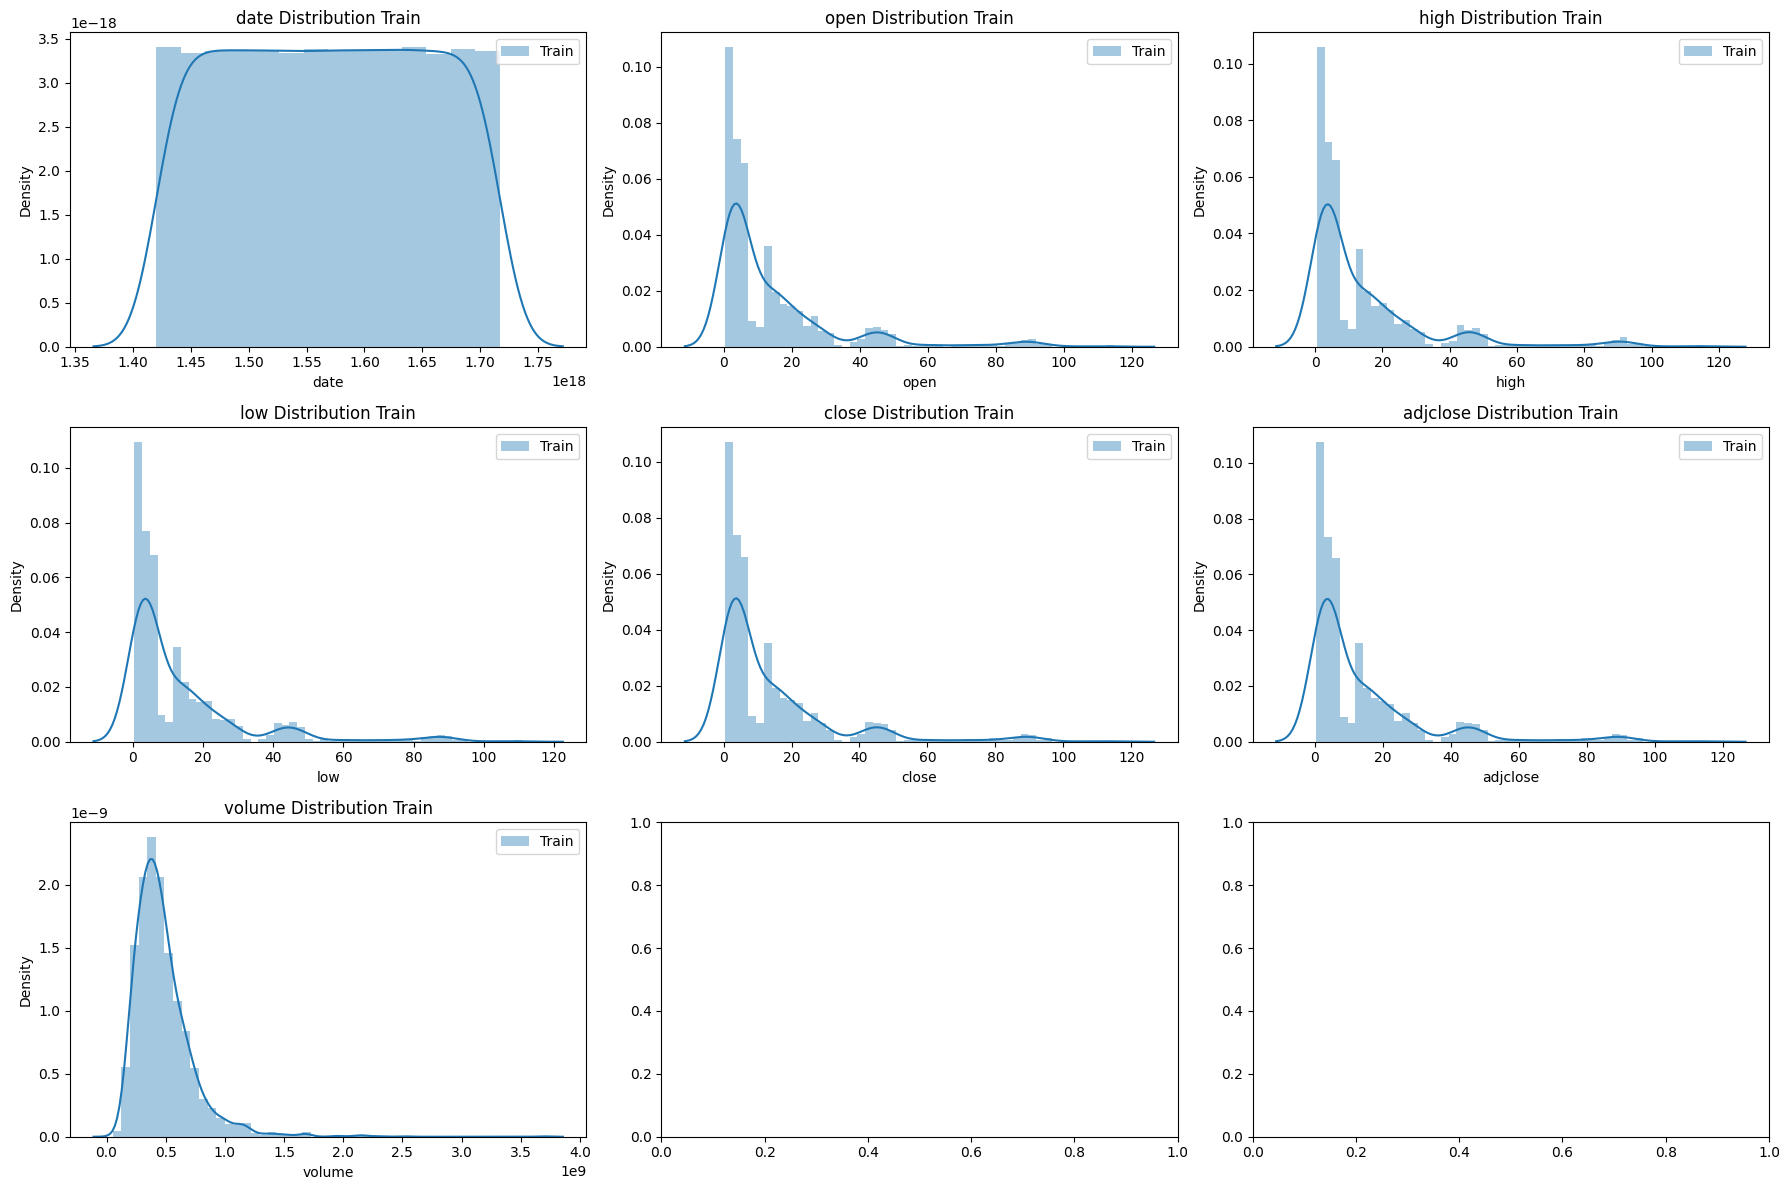

In [13]:
target = 'close'
def plot_histograms(df_train, target, n_cols=3):
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        ax = axes[i]
        sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
        #if var_name != target:
            #sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
        #sns.distplot(original[var_name], kde=True, ax=ax, label='Original')
        ax.set_title(f'{var_name} Distribution Train')
        ax.legend()

    plt.tight_layout()
    plt.show()
        
plot_histograms(df, df['close'], n_cols=3)

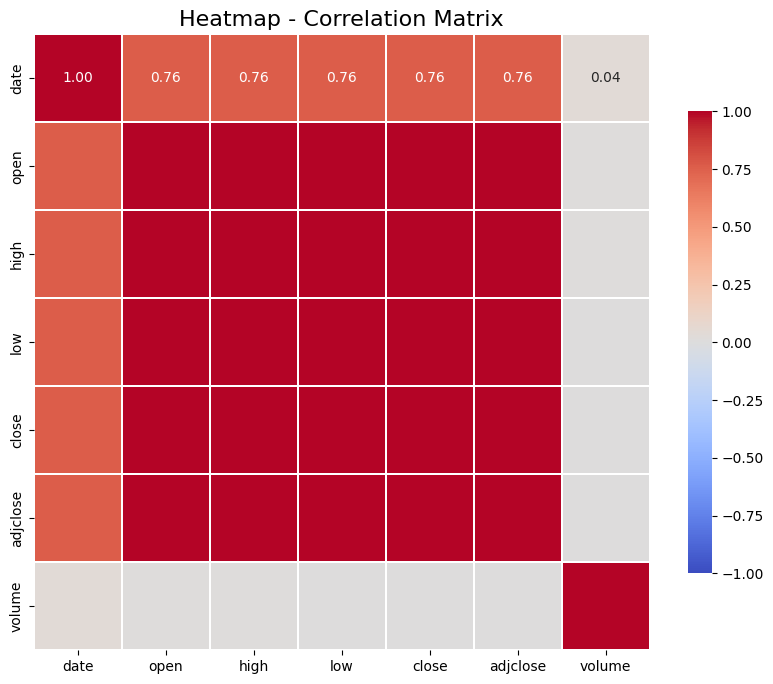

In [14]:
# Function to plot Heatmap (Correlation matrix)
def plot_heatmap(df, cmap='coolwarm', annot=True, figsize=(10, 8)):
    corr = df.corr()
    
    # heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=annot, cmap=cmap, fmt='.2f', linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, cbar_kws={"shrink": 0.75},  linecolor='white')
    plt.title("Heatmap - Correlation Matrix", fontsize=16)
    plt.show()

# Plot 
plot_heatmap(df)

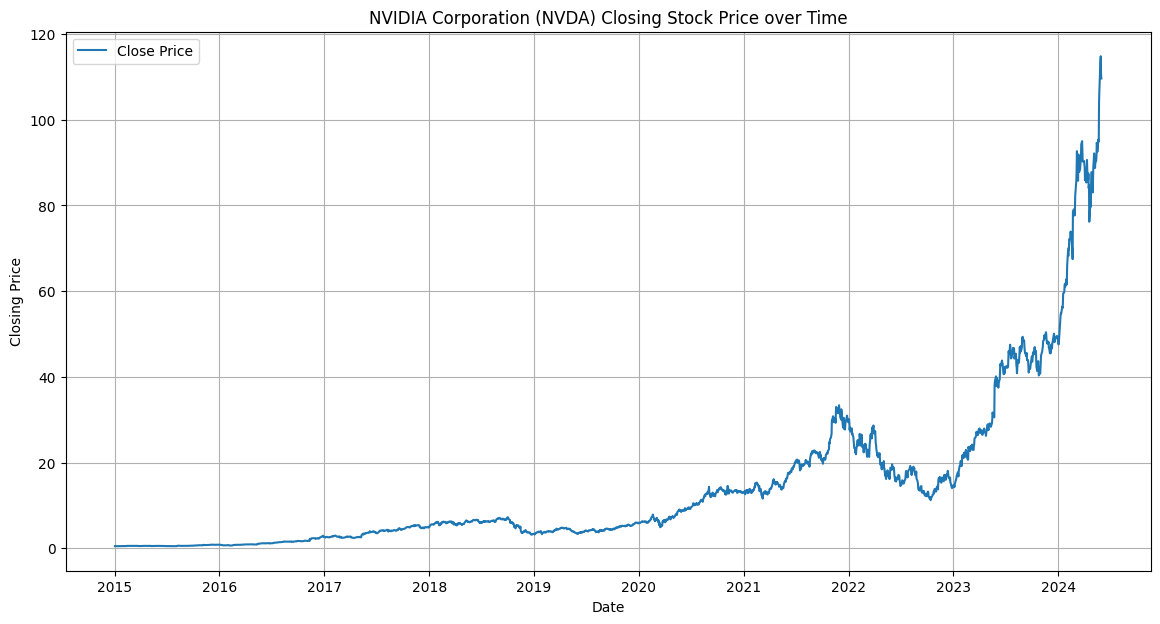

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.title('NVIDIA Corporation (NVDA) Closing Stock Price over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

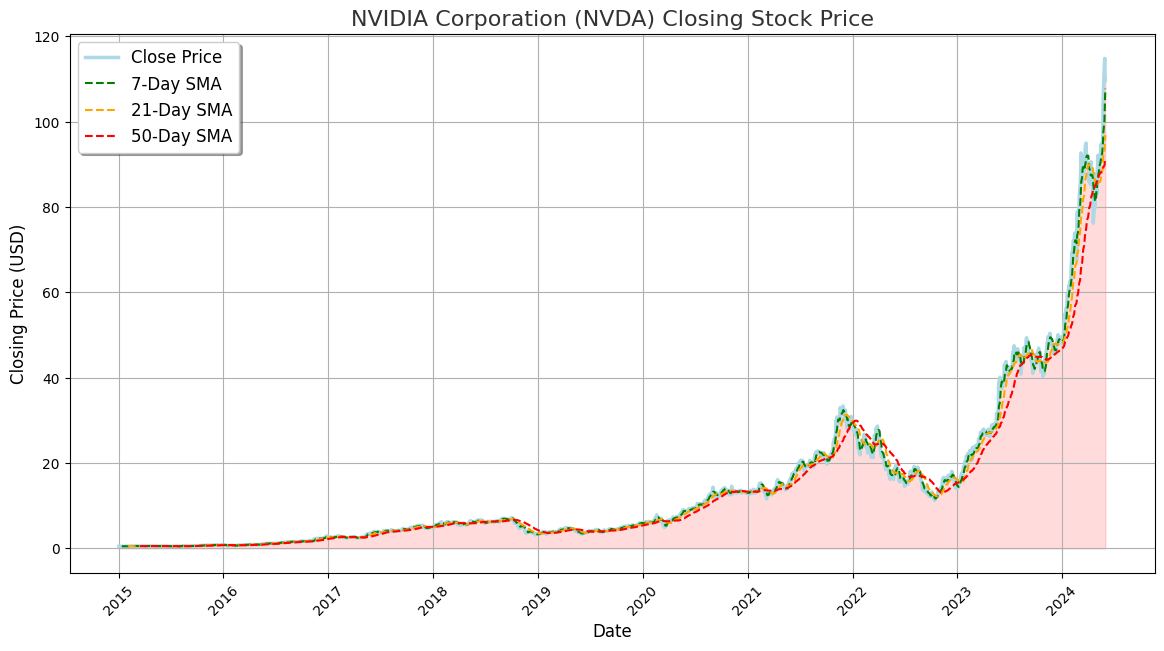

In [22]:
plt.figure(figsize=(14, 7))

# Line plot with a more vibrant color
plt.plot(df['date'], df['close'], label='Close Price', color='lightblue', linewidth=2.5)

plt.fill_between(df['date'], df['close'], color='#ff4c4c', alpha=0.2)

plt.title('NVIDIA Corporation (NVDA) Closing Stock Price', fontsize=16, color='#333')

plt.xlabel('Date', fontsize=12,)
plt.ylabel('Closing Price (USD)', fontsize=12,)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)

df['SMA_7'] = df['close'].rolling(window=7).mean()
plt.plot(df['date'], df['SMA_7'], label='7-Day SMA', color='green', linestyle='--')
df['SMA_21'] = df['close'].rolling(window=21).mean()
plt.plot(df['date'], df['SMA_21'], label='21-Day SMA', color='orange', linestyle='--')
df['SMA_50'] = df['close'].rolling(window=50).mean()
plt.plot(df['date'], df['SMA_50'], label='50-Day SMA', color='red', linestyle='--')

plt.legend(frameon=True, shadow=True, fontsize=12, loc='upper left')

plt.grid(True)

plt.show()

In [16]:
# Rate of Change (RoC)
df["RoC"] = df["close"].pct_change() * 100 

print(df.head())

        date     open     high      low    close  adjclose     volume  SMA_7  \
0 2015-01-02  0.50325  0.50700  0.49525  0.50325  0.483218  113680000    NaN   
1 2015-01-05  0.50325  0.50475  0.49250  0.49475  0.475056  197952000    NaN   
2 2015-01-06  0.49550  0.49600  0.47925  0.47975  0.460654  197764000    NaN   
3 2015-01-07  0.48325  0.48750  0.47700  0.47850  0.459453  321808000    NaN   
4 2015-01-08  0.48400  0.49950  0.48375  0.49650  0.476737  283780000    NaN   

   SMA_21  SMA_50       RoC  
0     NaN     NaN       NaN  
1     NaN     NaN -1.689023  
2     NaN     NaN -3.031831  
3     NaN     NaN -0.260552  
4     NaN     NaN  3.761751  


In [17]:
# For SMAs - Leave initial NaNs or forward fill (but not backfill!)
df["SMA_50"] = df["SMA_50"].fillna(method='ffill')  # Only after enough periods
df["SMA_7"] = df["SMA_7"].fillna(method='ffill')    # after 6 periods
df["SMA_21"] = df["SMA_21"].fillna(method='ffill')  # after 20 periods

# Option 2: Forward fill (preferred over 0)
df["RoC"] = df["RoC"].fillna(method='ffill')

/var/folders/b_/4psgx8w56t7fwv72p5yr971r0000gn/T/ipykernel_4432/3079411212.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["SMA_50"] = df["SMA_50"].fillna(method='ffill')  # Only after enough periods
/var/folders/b_/4psgx8w56t7fwv72p5yr971r0000gn/T/ipykernel_4432/3079411212.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["SMA_7"] = df["SMA_7"].fillna(method='ffill')    # after 6 periods
/var/folders/b_/4psgx8w56t7fwv72p5yr971r0000gn/T/ipykernel_4432/3079411212.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["SMA_21"] = df["SMA_21"].fillna(method='ffill')  # after 20 periods
/var/folders/b_/4psgx8w56t7fwv72p5yr971r0000gn/T/ipykernel_4432/3079411212.py:7: FutureWarning: Series.fillna with 'method' is depr

In [18]:
#Moving Average Convergence Divergence
#12-day EMA and 26-day EMA
df["EMA_12"] = df["close"].ewm(span=12, adjust=False).mean()
df["EMA_26"] = df["close"].ewm(span=26, adjust=False).mean()
# MACD Line
df["MACD"] = df["EMA_12"] - df["EMA_26"]
# Signal Line (9-day EMA of MACD)
df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

In [19]:
#Relative Strength Index
window = 14  # Typical RSI period

delta = df["close"].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

rs = gain / loss
df["RSI"] = 100 - (100 / (1 + rs))

In [20]:
#Daily Volatility
df["TR"] = abs(df["high"] - df["low"])  
df["ATR"] = df["TR"].rolling(window=14).mean()

In [21]:
#daily returns
df["Daily_Return"] = df["close"].pct_change()

In [22]:
#On Balance Volume
df["OBV"] = (df["volume"] * ((df["close"] > df["close"].shift(1)) * 2 - 1)).cumsum()

In [23]:
#Volume Weighted Average Price
df["VWAP"] = (df["close"] * df["volume"]).cumsum() / df["volume"].cumsum()

In [24]:
#Time based features
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month
df["Weekday"] = df["date"].dt.weekday
df["Day_of_Year"] = df["date"].dt.dayofyear


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2369 non-null   datetime64[ns]
 1   open          2369 non-null   float64       
 2   high          2369 non-null   float64       
 3   low           2369 non-null   float64       
 4   close         2369 non-null   float64       
 5   adjclose      2369 non-null   float64       
 6   volume        2369 non-null   int64         
 7   SMA_7         2363 non-null   float64       
 8   SMA_21        2349 non-null   float64       
 9   SMA_50        2320 non-null   float64       
 10  RoC           2368 non-null   float64       
 11  EMA_12        2369 non-null   float64       
 12  EMA_26        2369 non-null   float64       
 13  MACD          2369 non-null   float64       
 14  MACD_Signal   2369 non-null   float64       
 15  RSI           2356 non-null   float64 

In [26]:
df_new = df.drop('date', axis =1)

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          2369 non-null   float64
 1   high          2369 non-null   float64
 2   low           2369 non-null   float64
 3   close         2369 non-null   float64
 4   adjclose      2369 non-null   float64
 5   volume        2369 non-null   int64  
 6   SMA_7         2363 non-null   float64
 7   SMA_21        2349 non-null   float64
 8   SMA_50        2320 non-null   float64
 9   RoC           2368 non-null   float64
 10  EMA_12        2369 non-null   float64
 11  EMA_26        2369 non-null   float64
 12  MACD          2369 non-null   float64
 13  MACD_Signal   2369 non-null   float64
 14  RSI           2356 non-null   float64
 15  TR            2369 non-null   float64
 16  ATR           2356 non-null   float64
 17  Daily_Return  2368 non-null   float64
 18  OBV           2369 non-null 

/var/folders/b_/4psgx8w56t7fwv72p5yr971r0000gn/T/ipykernel_28358/1188950235.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_train[var_name], kde=True, ax=ax, label='Train')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/b_/4psgx8w56t7fwv72p5yr971r0000gn/T/ipykernel_28358/1188950235.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your cod

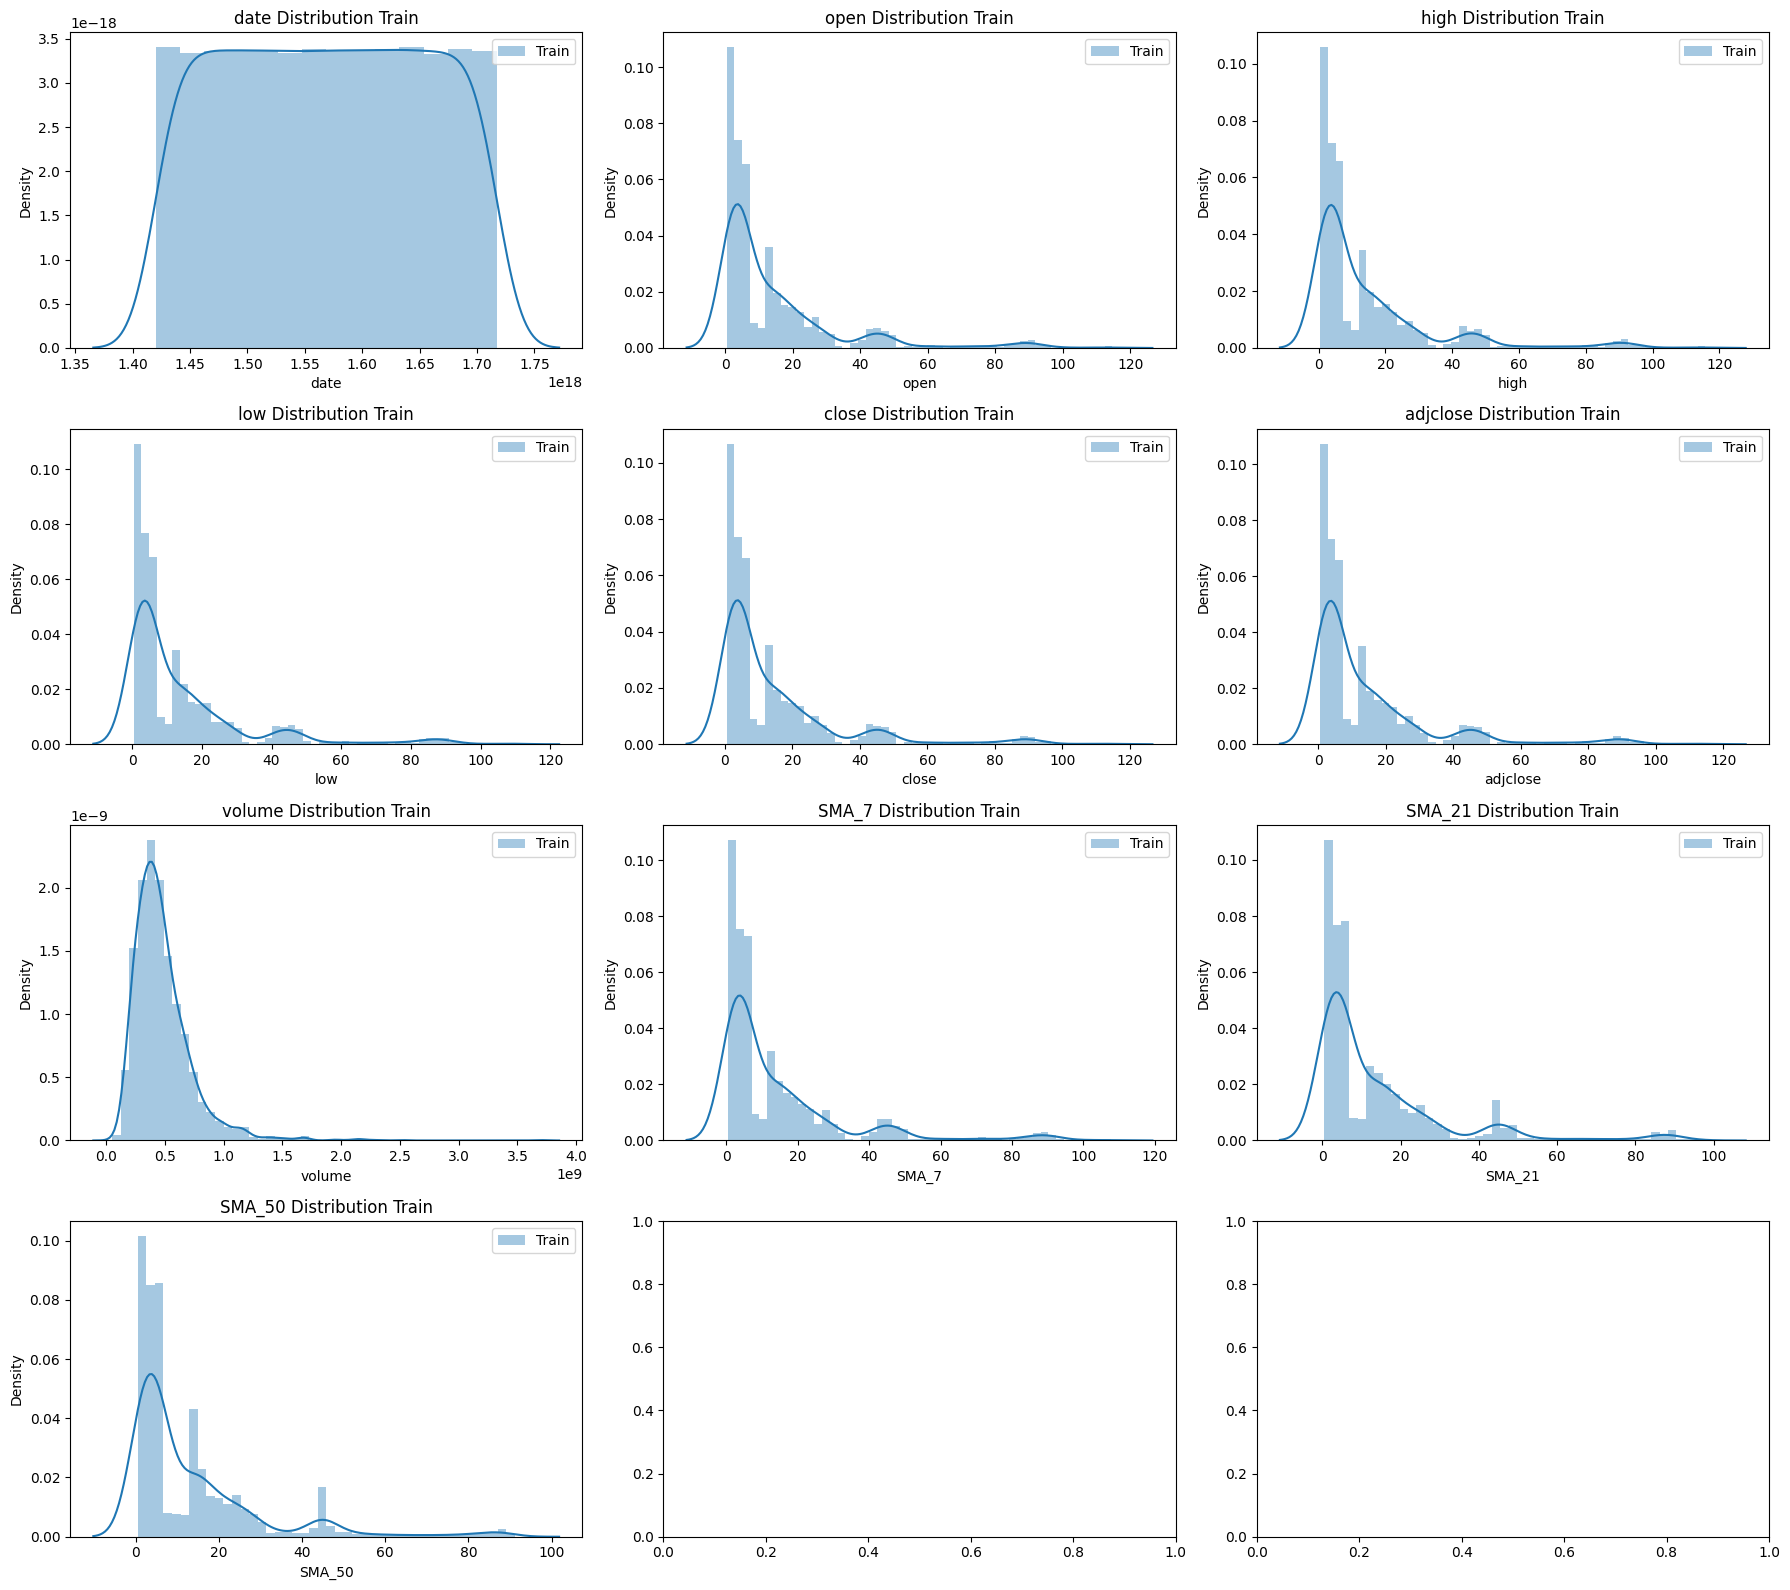

In [25]:
target = 'close'
def plot_histograms(df_new_train, target, n_cols=3):
    n_rows = (len(df_new_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_new_train.columns.tolist()):
        ax = axes[i]
        sns.distplot(df_new_train[var_name], kde=True, ax=ax, label='Train')
        #if var_name != target:
            #sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
        #sns.distplot(original[var_name], kde=True, ax=ax, label='Original')
        ax.set_title(f'{var_name} Distribution Train')
        ax.legend()

    plt.tight_layout()
    plt.show()
        
plot_histograms(df, df['close'], n_cols=3)

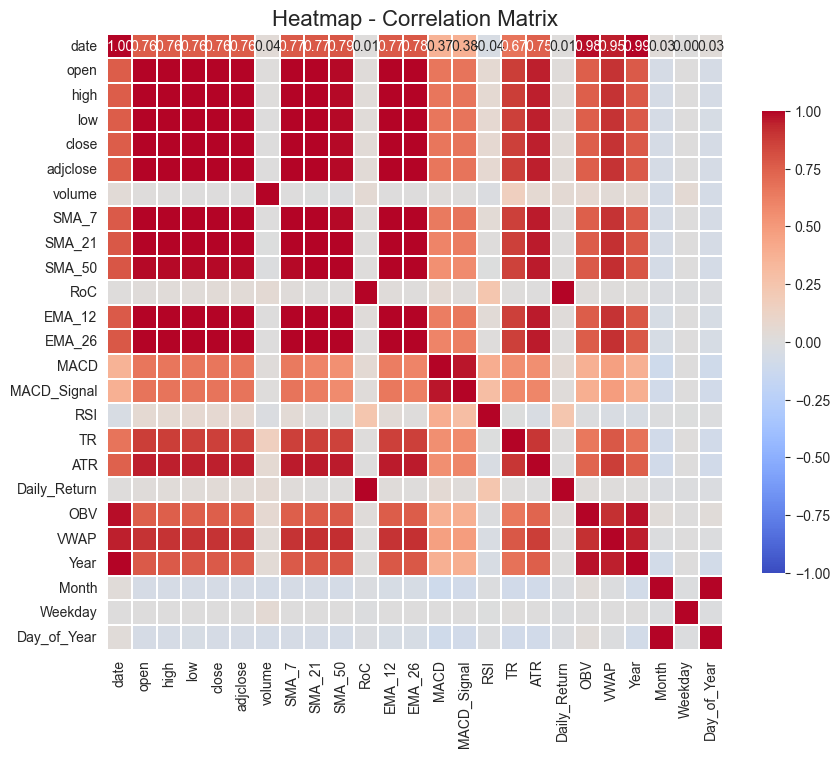

In [42]:
def plot_heatmap(df, cmap='coolwarm', annot=True, figsize=(10, 8)):
    # correlation matrix
    corr = df.corr()
    
    # heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=annot, cmap=cmap, fmt='.2f', linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, cbar_kws={"shrink": 0.75},  linecolor='white')
    plt.title("Heatmap - Correlation Matrix", fontsize=16)
    plt.show()

# Plot
plot_heatmap(df)

In [29]:
from sklearn.model_selection import train_test_split

X = df_new.drop('close', axis=1)  
y = df_new['close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2217)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (1895, 23), (1895,)
Test set: (474, 23), (474,)


In [ ]:
# Define the split index (80% for training, 20% for testing)
#split_index = int(len(df_new) * 0.8)

#X = df_new.drop('close', axis=1)  
#y = df_new['close']  

# First 80% for training
#X_train = X.iloc[:split_index]
#y_train = y.iloc[:split_index]

# Last 20% for testing
#X_test = X.iloc[split_index:]
#y_test = y.iloc[split_index:]

# Print shapes to confirm
#print(f"Training set: {X_train.shape}, {y_train.shape}")
#print(f"Test set: {X_test.shape}, {y_test.shape}")

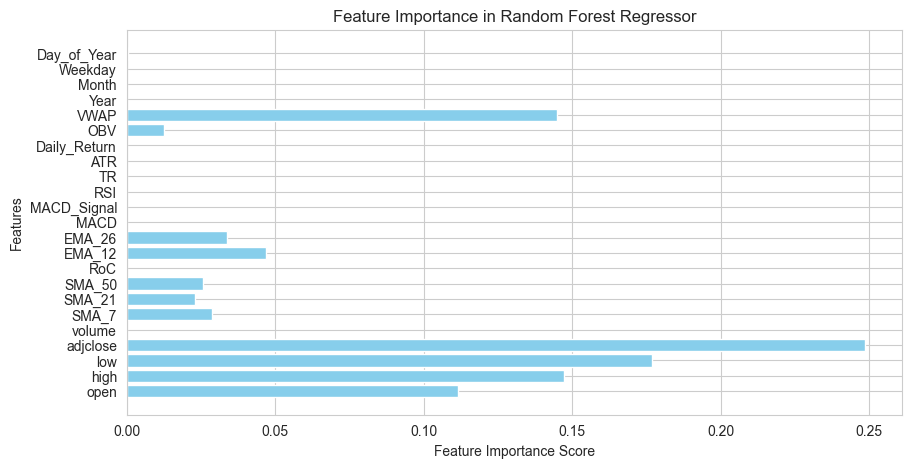

In [30]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)
feature_importance = rf_model.feature_importances_
features = X.columns

# Plotting Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()

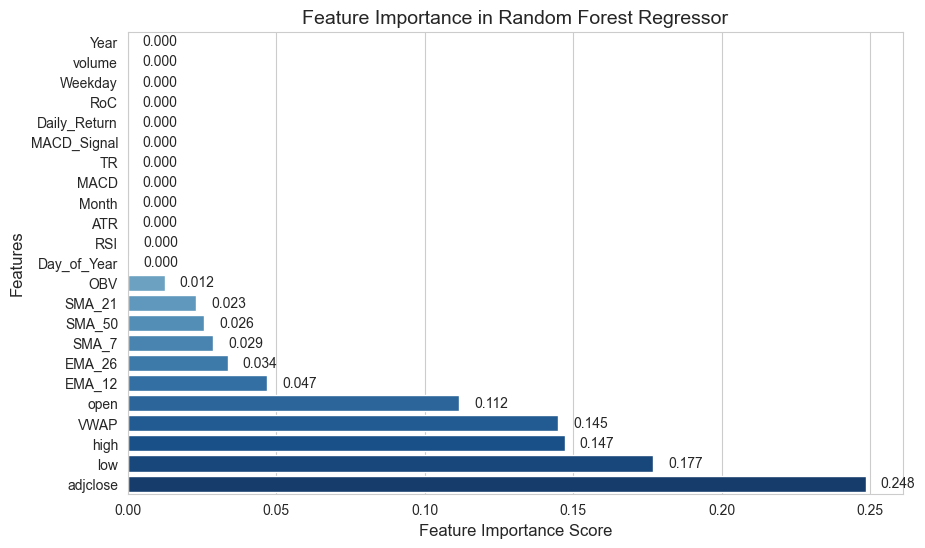

In [32]:
#  feature importance
feature_importance = rf_model.feature_importances_
features = X_train.columns

# DataFrame for sorting
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Seaborn style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues")

for index, value in enumerate(importance_df['Importance']):
    ax.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=10)

plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance in Random Forest Regressor", fontsize=14)
plt.show()

In [34]:

importance_df = pd.DataFrame({'Feature': features, 'Importance Score': feature_importance})
importance_df = importance_df.sort_values(by='Importance Score', ascending=False).round(4)

print(importance_df)

         Feature  Importance Score
3       adjclose            0.2485
2            low            0.1769
1           high            0.1470
18          VWAP            0.1449
0           open            0.1116
9         EMA_12            0.0470
10        EMA_26            0.0336
5          SMA_7            0.0287
7         SMA_50            0.0257
6         SMA_21            0.0230
17           OBV            0.0124
22   Day_of_Year            0.0003
13           RSI            0.0001
15           ATR            0.0001
20         Month            0.0001
11          MACD            0.0000
14            TR            0.0000
12   MACD_Signal            0.0000
16  Daily_Return            0.0000
8            RoC            0.0000
21       Weekday            0.0000
4         volume            0.0000
19          Year            0.0000


In [35]:
filtered_df = importance_df[importance_df['Importance Score'] >= 0.01]

filtered_df = filtered_df.sort_values(by='Importance Score', ascending=False)
print(filtered_df.to_string(index=False))  

 Feature  Importance Score
adjclose            0.2485
     low            0.1769
    high            0.1470
    VWAP            0.1449
    open            0.1116
  EMA_12            0.0470
  EMA_26            0.0336
   SMA_7            0.0287
  SMA_50            0.0257
  SMA_21            0.0230
     OBV            0.0124


In [36]:
from sklearn.metrics import mean_squared_error

selected_features = filtered_df['Feature'].tolist()

X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

rf_model_filtered = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_filtered.fit(X_train_filtered, y_train)

y_pred = rf_model_filtered.predict(X_test_filtered)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0731


In [37]:
from sklearn.model_selection import GridSearchCV
# hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples in a leaf node
}
grid_search = GridSearchCV(
    estimator=rf_model_filtered , 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

# Train on the filtered dataset
grid_search.fit(X_train_filtered, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [38]:
best_rf_model = RandomForestRegressor(
    max_depth=10, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=200, 
    random_state=42
)
best_rf_model.fit(X_train_filtered, y_train)

y_pred = best_rf_model.predict(X_test_filtered)
mse = mean_squared_error(y_test, y_pred)
print(f"Optimized Mean Squared Error: {mse:.4f}")

Optimized Mean Squared Error: 0.0747


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape*100:.2f}%")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

Mean Absolute Percentage Error (MAPE): 0.37%
Root Mean Squared Error (RMSE): 0.2733
R² Score (Coefficient of Determination): 0.9997


In [40]:
y_train_pred = best_rf_model.predict(X_train_filtered)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training MAPE: {train_mape*100:.2f}%")
print(f"Training R²: {train_r2:.4f}")

print("\nTest Set Performance:")
print(f"Test Mean Squared Error: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAPE: {mape*100:.2f}%")
print(f"Test R²: {r2:.4f}")


Training Mean Squared Error: 0.0142
Training RMSE: 0.1190
Training MAPE: 0.17%
Training R²: 1.0000

Test Set Performance:
Test Mean Squared Error: 0.0747
Test RMSE: 0.2733
Test MAPE: 0.37%
Test R²: 0.9997
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimat

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

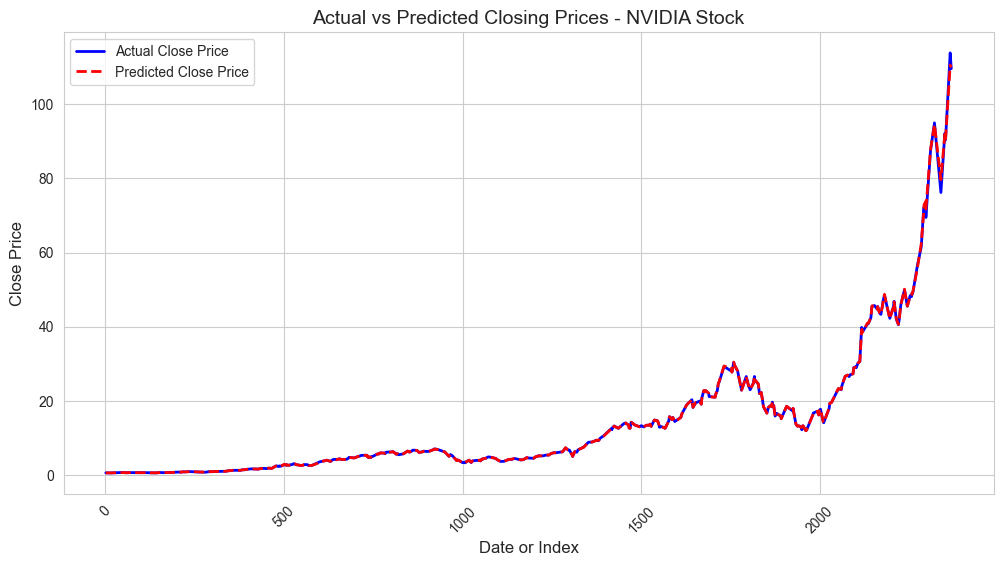

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# DataFrame for comparison
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=X_test.index)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x=results_df.index, y='Actual', label='Actual Close Price', linewidth=2, color='blue')
sns.lineplot(data=results_df, x=results_df.index, y='Predicted', label='Predicted Close Price', linewidth=2, linestyle='dashed', color='red')

# Formatting
plt.xlabel("Date or Index", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.title("Actual vs Predicted Closing Prices - NVIDIA Stock", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [2]:
# LSTM model

df = pd.read_csv("nvidia_stock_2015_to_2024.csv")
df= df.drop('Unnamed: 0', axis=1)
df['date'] = pd.to_datetime(df['date'])
df = df.drop('date', axis=1)
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# For reproducibility
import tensorflow as tf
np.random.seed(2217)
tf.random.set_seed(2217)




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# 1. Split the data first (before scaling)
train_size = int(len(df) * 0.8)
val_size = int(len(df) * 0.1)
test_size = len(df) - train_size - val_size

train_data = df['close'][:train_size].values.reshape(-1, 1)
val_data = df['close'][train_size:train_size + val_size].values.reshape(-1, 1)
test_data = df['close'][train_size + val_size:].values.reshape(-1, 1)

# 2. Scale the data using only the training set
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
val_scaled = scaler.transform(val_data)  # Use scaler from training
test_scaled = scaler.transform(test_data)  # Use scaler from training

# Function to create sequences
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60

# 3. Prepare sequences for validation/test with overlap from previous sets
def prepare_sequences(scaled_prev, scaled_target, time_step):
    # Concatenate last `time_step` points from previous set with target set
    combined = np.concatenate([scaled_prev[-time_step:], scaled_target], axis=0)
    X, y = create_dataset(combined, time_step)
    return X, y

# For training, use only train_scaled
X_train, y_train = create_dataset(train_scaled, time_step)

# For validation, combine last `time_step` of train_scaled with val_scaled
X_val, y_val = prepare_sequences(train_scaled, val_scaled, time_step)

# For test, combine last `time_step` of val_scaled with test_scaled
X_test, y_test = prepare_sequences(val_scaled, test_scaled, time_step)

# Reshape for LSTM [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_lstm = Sequential([
    LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(200, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Making predictions
train_predict = model_lstm.predict(X_train)
val_predict = model_lstm.predict(X_val)
test_predict = model_lstm.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
val_predict = scaler.inverse_transform(val_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform the actual values
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Function to calculate RMSE and R^2
def evaluate_model(actual, predicted, dataset_name):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    print(f"{dataset_name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}")

# Evaluating the model
evaluate_model(y_train_actual, train_predict, "Training")
evaluate_model(y_val_actual, val_predict, "Validation")
evaluate_model(y_test_actual, test_predict, "Test")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Visualization
plt.figure(figsize=(16, 10))

# Create time indices
total_len = len(train_predict) + len(val_predict) + len(test_predict)
time_index = np.arange(total_len)

# Plot actual values
plt.plot(time_index[:len(train_predict)], y_train_actual, label='Train Actual', alpha=0.6)
plt.plot(time_index[len(train_predict):len(train_predict)+len(val_predict)], y_val_actual, label='Validation Actual', alpha=0.6)
plt.plot(time_index[-len(test_predict):], y_test_actual, label='Test Actual', alpha=0.6)

# Plot predictions
plt.plot(time_index[:len(train_predict)], train_predict, label='Train Predicted', linestyle='--')
plt.plot(time_index[len(train_predict):len(train_predict)+len(val_predict)], val_predict, label='Validation Predicted', linestyle='--')
plt.plot(time_index[-len(test_predict):], test_predict, label='Test Predicted', linestyle='--')

# Add vertical separators
plt.axvline(len(train_predict), color='black', linestyle=':', alpha=0.6)
plt.axvline(len(train_predict)+len(val_predict), color='black', linestyle=':', alpha=0.6)

# Add annotations
plt.text(len(train_predict)//2, plt.ylim()[1]*0.95, 
         f'Train R²: {r2_score(y_train_actual, train_predict):.2f}', ha='center')
plt.text(len(train_predict) + len(val_predict)//2, plt.ylim()[1]*0.95, 
         f'Val R²: {r2_score(y_val_actual, val_predict):.2f}', ha='center')
plt.text(len(train_predict)+len(val_predict)+len(test_predict)//2, plt.ylim()[1]*0.95, 
         f'Test R²: {r2_score(y_test_actual, test_predict):.2f}', ha='center')

plt.title('Actual vs Predicted Prices Across All Datasets', fontsize=14)
plt.xlabel('Time Index', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Progress', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()



NameError: name 'pd' is not defined

In [ ]:
# Hybrid Model

df['ma-7'] = df['close'].rolling(window=7).mean()
df['ma-21'] = df['close'].rolling(window=21).mean()
df['ma-50'] = df['close'].rolling(window=50).mean()
df['ma-200'] = df['close'].rolling(window=200).mean()
df['std-7'] = df['close'].rolling(window=7).std()
df['std-21'] = df['close'].rolling(window=21).std()
df['std-50'] = df['close'].rolling(window=50).std()
df['std-200'] = df['close'].rolling(window=200).std()
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

df1 =  pd.DataFrame(train_predict, columns=['train_predict']).reset_index(drop=True)
df2 =  pd.DataFrame(val_predict, columns=['val_predict']).reset_index(drop=True)
df3 =  pd.DataFrame(test_predict, columns=['test_predict']).reset_index(drop=True)

train_datan = df[time_step:train_size].reset_index(drop=True)
val_datan = df[train_size:train_size + val_size].reset_index(drop=True)
test_datan = df[train_size + val_size:].reset_index(drop = True)

train_datan['predicted_close'] = df1['train_predict']
val_datan['predicted_close'] = df2['val_predict']
test_datan['predicted_close'] = df3['test_predict']

features = ['open', 'high', 'low', 'volume', 'adjclose', 'ma-7', 'ma-21', 'std-7', 
            'std-21', 'predicted_close']
target = 'close'
X_train = train_datan[features]
X_val = val_datan[features]
X_test = test_datan[features]
y_train = train_datan[target]
y_val = val_datan[target]
y_test = test_datan[target]

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ada_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=10),  # <-- changed from base_estimator
    n_estimators=1000,
    learning_rate=0.1,
    loss='linear'
)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_val)
mae_ada = mean_absolute_error(y_val, y_pred_ada)
mse_ada = mean_squared_error(y_val, y_pred_ada)
r2_ada = r2_score(y_val, y_pred_ada)

print("AdaBoost with LSTM - MAE:", mae_ada, "MSE:", mse_ada, "R2:", r2_ada)

y_testpred_ada = ada_model.predict(X_test)
mae_test_ada = mean_absolute_error(y_test, y_testpred_ada)
mse_test_ada = mean_squared_error(y_test, y_testpred_ada)
r2_test_ada = r2_score(y_test, y_testpred_ada)

print("AdaBoost with LSTM test set - MAE:", mae_test_ada, "MSE:", mse_test_ada, "R2:", r2_test_ada)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Create DataFrame for comparison
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_testpred_ada}, index=X_test.index)

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x=results_df.index, y='Actual', label='Actual Close Price', linewidth=2, color='blue')
sns.lineplot(data=results_df, x=results_df.index, y='Predicted', label='Predicted Close Price', linewidth=2, linestyle='dashed', color='red')

# Formatting
plt.xlabel("Date or Index", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.title("Actual vs Predicted Closing Prices - NVIDIA Stock (Test set)", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()